<b> <center>OVERVIEW:</center> </b>
    
   The information age enables people to obtain news online through various channels, yet in the meanwhile making false news spread at unprecedented speed. Fake news exerts detrimental effects for it impairs social stability and public trust, which calls for increasing demand for fake news detection (FND). As deep learning (DL) achieves tremendous success in various domains, it has also been leveraged in FND tasks and surpasses traditional machine learning based methods, yielding state-of-the-art performance. 

<b> <center>IMPORT LIBEARIES</center> </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

<b> <center>LOAD DATA</center> </b>

In [73]:
data = pd.read_csv('Fake.csv')
dff = data.copy() 

In [74]:
data = pd.read_csv('True.csv')
dft= data.copy() 

In [75]:
dff

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [76]:
dft

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [77]:
dff.shape

(23481, 4)

In [78]:
dft.shape

(21417, 4)

<b> <center>PREPROCESSING</center> </b>

In [79]:
dff["Fake"] = 0
dft["Fake"] = 1

In [80]:
df = pd.concat([dff, dft])


In [81]:
df

,title,text,subject,date,Fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [82]:
df.isnull().sum()


title      0
text       0
subject    0
date       0
Fake       0
dtype: int64

In [83]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Fake     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


<b> <center>VISUALIZATION</center> </b>

<AxesSubplot:xlabel='Fake', ylabel='count'>

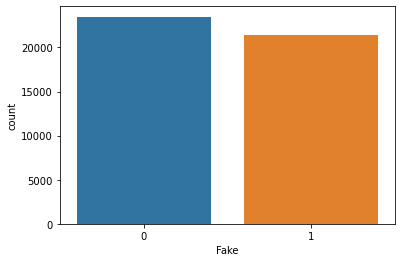

In [84]:
sns.countplot(x='Fake', data=df)

In [85]:
print(f"Dataset subject unique values: {df['subject'].unique()}")

Dataset subject unique values: ['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east'
 'politicsNews' 'worldnews']


<AxesSubplot:xlabel='subject', ylabel='count'>

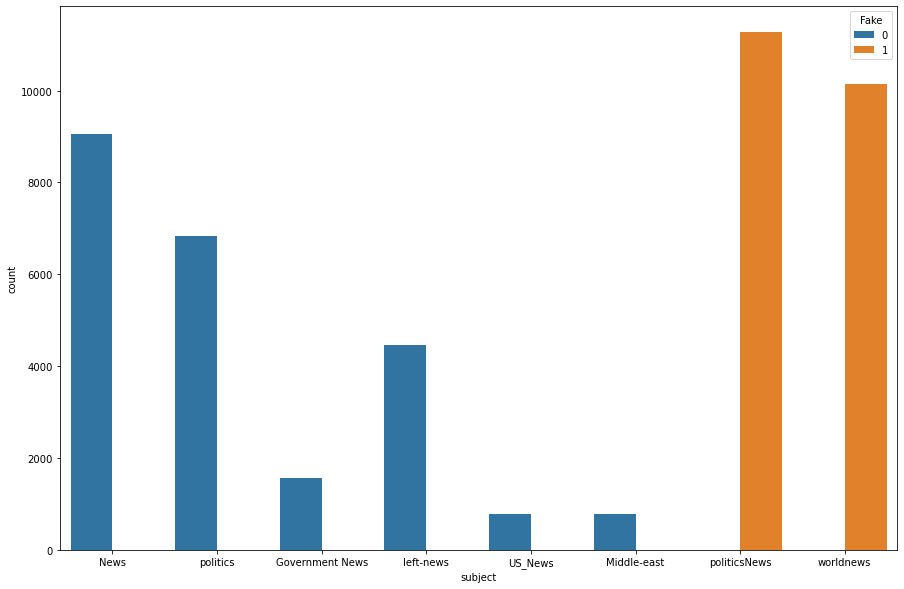

In [86]:
plt.figure(figsize=(15,10))

sns.countplot(x='subject', data=df, hue='Fake')

In [87]:
#df_news['Year'] = (df_news['date']).Year
#df_news['month'] = (df_news['date']).month_name()

#df_news.head()

In [88]:
df['date'] = pd.to_datetime(df['date'], errors='coerce') # If 'coerce', then invalid parsing will be set as NaT.
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

df.head()

,title,text,subject,date,Fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0,2017.0,12.0


In [89]:
# combining the title and text column and drop title column
df['text'] = df['title'] + df['text']
df.drop(labels=['title'], axis=1, inplace=True)

In [90]:
df

,text,subject,date,Fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,News,2017-12-31,0,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,News,2017-12-31,0,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,News,2017-12-30,0,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,2017-12-29,0,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,News,2017-12-25,0,2017.0,12.0
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,worldnews,2017-08-22,1,2017.0,8.0
21413,LexisNexis withdrew two products from Chinese ...,worldnews,2017-08-22,1,2017.0,8.0
21414,Minsk cultural hub becomes haven from authorit...,worldnews,2017-08-22,1,2017.0,8.0
21415,Vatican upbeat on possibility of Pope Francis ...,worldnews,2017-08-22,1,2017.0,8.0


In [91]:
# removing unnecessary colums
df = df.drop(['subject', 'date'], axis=1)

In [92]:
df

,text,Fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,0,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,0,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,0,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,0,2017.0,12.0
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,1,2017.0,8.0
21413,LexisNexis withdrew two products from Chinese ...,1,2017.0,8.0
21414,Minsk cultural hub becomes haven from authorit...,1,2017.0,8.0
21415,Vatican upbeat on possibility of Pope Francis ...,1,2017.0,8.0


<AxesSubplot:xlabel='Year', ylabel='count'>

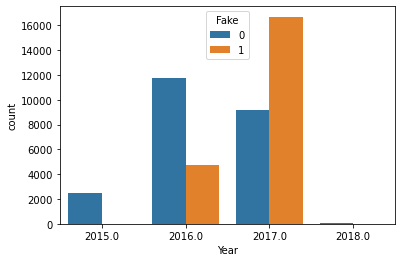

In [93]:
sns.countplot(x='Year', data=df, hue='Fake')


<AxesSubplot:xlabel='Month', ylabel='count'>

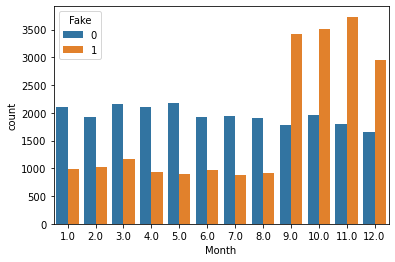

In [94]:
sns.countplot(x='Month', data=df, hue='Fake')


In [95]:
df = df.drop(['Year', 'Month'], axis=1)

In [96]:
df

,text,Fake
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,1
21413,LexisNexis withdrew two products from Chinese ...,1
21414,Minsk cultural hub becomes haven from authorit...,1
21415,Vatican upbeat on possibility of Pope Francis ...,1


In [97]:
# shuffling the data
df = df.sample(frac = 1)
# resetting the index values
df.reset_index(inplace=True, drop=True)


In [98]:
df

,text,Fake
0,COMMUNISM 101: CA School District Bans All Dra...,0
1,Senate intelligence panel requests Trump campa...,1
2,Man with Palestinian flag smashes Jewish resta...,1
3,Russia accuses U.S. of training former Islamic...,1
4,Toxic algae and ice cream party keep top Repub...,1
...,...,...
44893,UN Celebrates Its 70th Anniversary With Commun...,0
44894,Merkel's CDU agrees to pursue grand coalition ...,1
44895,U.S. to vote against U.N. resolution calling f...,1
44896,Indonesian court recognizes native religions i...,1


In [99]:
df.isnull().sum()


text    0
Fake    0
dtype: int64

In [100]:
df.describe(include='all')


,text,Fake
count,44898,44898.000000
unique,39105,NaN
top,Highlights: The Trump presidency on April 13 a...,NaN
freq,8,NaN
mean,NaN,0.477015
std,NaN,0.499477
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [101]:
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.reset_index(inplace=True, drop=True)

In [102]:
df.describe(include='all')


,text,Fake
count,39105,39105.000000
unique,39105,NaN
top,COMMUNISM 101: CA School District Bans All Dra...,NaN
freq,1,NaN
mean,NaN,0.542053
std,NaN,0.498235
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [103]:
df

,text,Fake
0,COMMUNISM 101: CA School District Bans All Dra...,0
1,Senate intelligence panel requests Trump campa...,1
2,Man with Palestinian flag smashes Jewish resta...,1
3,Russia accuses U.S. of training former Islamic...,1
4,Toxic algae and ice cream party keep top Repub...,1
...,...,...
39100,Republicans alarmed at talk U.S. may ease Iran...,1
39101,"After sanctions, Tillerson may find Russia tal...",1
39102,Merkel's CDU agrees to pursue grand coalition ...,1
39103,U.S. to vote against U.N. resolution calling f...,1


In [112]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aliya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

<b> <center>PORTERSTEMMER</center> </b>

In [116]:
import nltk
from nltk.stem import PorterStemmer

In [117]:
ps = PorterStemmer()

In [124]:
def stemming_word(text):
    stemmed_text = re.sub('[^a-zA-Z]',' ',text)
    stemmed_text = stemmed_text.lower()
    stemmed_text= stemmed_text.split()
    stemmed_text = [ps.stem(word)for word in stemmed_text if not word in stopwords.words('english')]
    stemmed_text= ' '.join(stemmed_text)
    
    return stemmed_text

In [125]:
df['text']=df['text'].apply(stemming_word)

In [126]:
print(df['text'])


0        commun ca school district ban draw religi figu...
1        senat intellig panel request trump campaign do...
2        man palestinian flag smash jewish restaur wind...
3        russia accus u train former islam state fighte...
4        toxic alga ice cream parti keep top republican...
                               ...                        
39100    republican alarm talk u may eas iran tradewash...
39101    sanction tillerson may find russia talk uphil ...
39102    merkel cdu agre pursu grand coalit germanyberl...
39103    u vote u n resolut call end cuba embargounit n...
39104    indonesian court recogn nativ religion landmar...
Name: text, Length: 39105, dtype: object


In [127]:
X=df['text']
Y=df['Fake']

In [128]:
vectorizer=TfidfVectorizer() ## tf : term frequency , idf : inverse document frequency

vectorizer.fit(X)           ### idf : 
X= vectorizer.transform(X)  ### tf: the number time a particular word repeat in data 

In [129]:
print(X)


  (0, 105374)	0.01776345698653433
  (0, 104031)	0.04664745437189055
  (0, 104027)	0.016165143647002278
  (0, 103924)	0.20543253828908012
  (0, 103783)	0.099895414964948
  (0, 102604)	0.045696310632113414
  (0, 102318)	0.025194981714178586
  (0, 102134)	0.022706132369358513
  (0, 102113)	0.026993334120344162
  (0, 101457)	0.02225946002884571
  (0, 100601)	0.08192611629645409
  (0, 99889)	0.023047515604777018
  (0, 99278)	0.22933722220529024
  (0, 97902)	0.05569135136047429
  (0, 96703)	0.021223227208845067
  (0, 94187)	0.05042652453734663
  (0, 94178)	0.020168531616481713
  (0, 93216)	0.034128568666736005
  (0, 93051)	0.02667302868435362
  (0, 92514)	0.038701881422717195
  (0, 92439)	0.06614484211627518
  (0, 92438)	0.052185890212317176
  (0, 92410)	0.039986004770653165
  (0, 92274)	0.07565048079417586
  (0, 91993)	0.030355603691430297
  :	:
  (39104, 13611)	0.11011442712225657
  (39104, 12051)	0.043845755168499645
  (39104, 12050)	0.06385464900902225
  (39104, 10399)	0.0794885606387256

<b> <center>MODELING</center> </b>

In [132]:
from sklearn.model_selection import train_test_split 

In [133]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, Y, test_size=0.3, random_state=25, shuffle=True)
print(Xtrain.shape, Ytrain.shape)
print(Xtest.shape, Ytest.shape)

(27373, 107439) (27373,)
(11732, 107439) (11732,)


<b> <center>LOGISTC REGRESSION</center> </b>

In [136]:
from sklearn.linear_model import LogisticRegression

In [140]:
L_model = LogisticRegression(random_state=25)

In [141]:
L_model.fit(Xtrain, Ytrain)

LogisticRegression(random_state=25)

In [144]:
Xtrain_prediction=L_model.predict(Xtrain)
training_data_accuracy = accuracy_score (Xtrain_prediction,Ytrain)

Xtest_prediction=L_model.predict(Xtest)
test_data_accuracy=accuracy_score(Xtest_prediction,Ytest)

print('accuracy score of train data :',training_data_accuracy)
print('accuracy score of test data :',test_data_accuracy)

accuracy score of train data : 0.9900266686150586
accuracy score of test data : 0.9840606887146267
